# Python California Housing Dataset Linear Regression Example

In this notebook, the example code uses the simple and multiple linear regression models developed from scratch using Python programming with the NumPy library. Additional code I would use has been provided in the examples to explain the methods behind machine learning hold-out cross-validation. The multiple linear regression example is similar to the simple linear regression example, which makes it easier for anyone to follow along and build their skills on from simple linear regression. The notebook is for educational purposes and has been designed as an introduction to machine learning with Python.

# Library Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import sklearn

print('ScikitLearn Version: ', sklearn.__version__)

ScikitLearn Version:  1.6.1


# Mount Google Drive to the Notebook

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load the California Housing Dataset

ScikitLearn California Housing Dataset Link:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [3]:
X = pd.read_csv('/content/drive/MyDrive/Linear_Regression/X.csv')
y = pd.read_csv('/content/drive/MyDrive/Linear_Regression/y.csv')

X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
y

,MedHouseValue
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


# Convert the Dataset from Pandas DataFrames to NumPy Arrays

In [5]:
X = X.values
print('X shape: ', X.shape)
y = y.values.ravel()
print('y shape: ', y.shape)

X shape:  (20640, 8)
y shape:  (20640,)


# Simple Linear Regression

# Normalise the Dataset

In [6]:
standard_x = StandardScaler()
standard_y = StandardScaler()
X = standard_x.fit_transform(X)
y = standard_y.fit_transform(y[:, np.newaxis]).flatten()

# Reduce the Features (X) Down to One Single Feature (Median Income)

In [7]:
X = X[:, [0]]  # Use only one feature
X

array([[ 2.34476576],
       [ 2.33223796],
       [ 1.7826994 ],
       ...,
       [-1.14259331],
       [-1.05458292],
       [-0.78012947]])

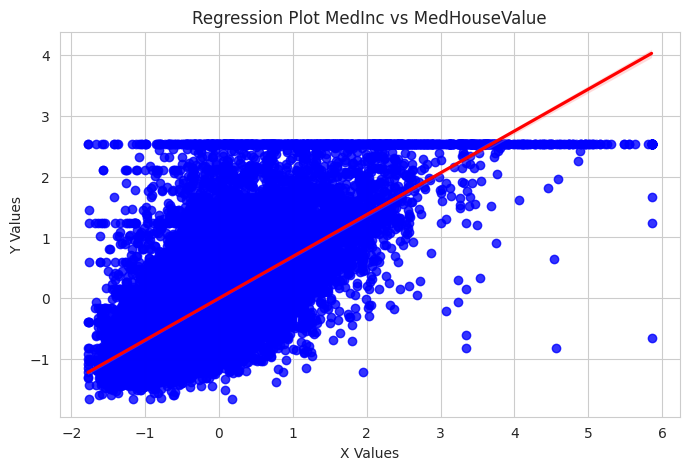

In [8]:
# Create the regression plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.regplot(x=X, y=y, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Regression Plot MedInc vs MedHouseValue")

# Show the plot
plt.show()

# Split the Training and Test Data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X train shape: ', X_train.shape)
print('y train shape: ', y_train.shape)
print('X test shape: ', X_test.shape)
print('y test shape: ', y_test.shape)

X train shape:  (16512, 1)
y train shape:  (16512,)
X test shape:  (4128, 1)
y test shape:  (4128,)


In [10]:
X_train

array([[-0.32165429],
       [-0.03061993],
       [ 0.1503488 ],
       ...,
       [-0.49283239],
       [ 0.97302487],
       [-0.68174943]])

In [11]:
y_train

array([-0.90001975,  1.51867493, -0.29686264, ...,  0.13210686,
        0.66420236,  1.02384345])

In [12]:
X_test

array([[-1.15248922],
       [-0.70501534],
       [-0.20558796],
       ...,
       [ 2.82092723],
       [-0.57147326],
       [-0.16768875]])

In [13]:
y_test

array([-1.37925233, -1.39571783,  2.54041094, ...,  2.54041094,
       -1.16606749, -0.4797163 ])

# Split the Training and Validation Data

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print('X train shape: ', X_train.shape)
print('y train shape: ', y_train.shape)
print('X val shape: ', X_val.shape)
print('y val shape: ', y_val.shape)

X train shape:  (13209, 1)
y train shape:  (13209,)
X val shape:  (3303, 1)
y val shape:  (3303,)


In [15]:
X_train

array([[ 0.44017249],
       [ 0.00227869],
       [-0.51999349],
       ...,
       [ 0.05986443],
       [ 0.33716033],
       [ 0.17335152]])

In [16]:
y_train

array([-0.25959862, -0.2907964 , -0.01868242, ...,  0.07317772,
       -0.58804193, -0.221468  ])

In [17]:
X_val

array([[-0.17537386],
       [-0.8938271 ],
       [ 0.1770888 ],
       ...,
       [-0.14694945],
       [-0.12931579],
       [-0.12026209]])

In [18]:
y_val

array([-0.95461586, -1.13833613,  1.94157819, ...,  0.85572207,
       -0.19373664,  0.02204802])

# Linear Regression Model Python Object

In [19]:
# LinearRegression Python object
class LinearRegression(object):

    # Class constructor
    def __init__(self, learning_rate=0.001, iterations=1000):

        """Linear Regression Python object.
           ARGS:
               lr (float): Learning rate.
               iterations (int): Maximum number of iterations.
        """
        self.lr = learning_rate
        self.iterations = iterations

    # Fit method to train and validate teh Linear Regression model
    def fit(self, X_train, y_train, X_val, y_val):

        """Python class method to train and validate teh Linear Regression model.
           ARGS:
               X_train (numpy array): training dataset features.
               y_train (numpy array): training dataset targets.
               X_val (numpy array): validation dataset features.
               y_val (numpy array): validation dataset targets.
        """

        self.w_ = np.zeros(1 + X_train.shape[1]) # Weights and bias NumPy array of zeros
        self.cost_train_ = []                    # Stores the training cost MSE values
        self.cost_val_ = []                      # Stores the validation cost MSE values
        self.low_cost= None                      # Stores the lowest cost interation value

        # Controls the maximum number of iterations set for training and validation
        for i in range(self.iterations):

            # Training iteration
            output = self.net_input(X_train)                 # LR model output
            errors = (y_train - output)                      # LR model error calculation
            self.w_[1:] += self.lr * X_train.T.dot(errors)   # Weights Gradient Descent
            self.w_[0] += self.lr * errors.sum()             # Bias Gradient Descent
            cost_train = (errors**2).sum() / len(errors)     # MSE cost calculation
            self.cost_train_.append(cost_train)              # MSE cost caculation list storage
            print('\nTraining Iteration: \t', i+1, '\tTraining Cost: \t\t', cost_train)

            # Validation iteration
            output_val = self.net_input(X_val)         # LR model output
            errors_val = (y_val - output_val)          # LR model error calculation
            cost_val = (errors**2).sum() / len(errors) # MSE cost calculation
            self.cost_val_.append(cost_val)            # MSE cost caculation list storage
            print('Validation Iteration: \t', i+1, '\tValidation Cost: \t', cost_val)

        # Calculates the index of the minimum cost and how many epoch to train the model
        # for after training and validation
        self.low_cost = (self.cost_val_.index(min(self.cost_val_)) + 1)
        print(f"\nSet Number of Epoch to {self.low_cost}")
        print('Minimum Cost: ', min(self.cost_val_))
        return self

    # Python class method to calculate the dot product between the features and the weights then adding the bias
    def net_input(self, X):
        """Python class method to calculate the dot product between the features and the weights then adding the bias.
           ARGS:
                  X (numpy array): dataset features.
           RETURNS:
                  dot product between the features (X) and the weights (W) plus the bias (b)
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]

    # Python class method to make model predictions without calculating the cost
    def predict(self, X):
        """Python class method to make model predictions without calculating the cost.
           ARGS:
                   X (numpy array): dataset features.
           RETURNS:
                   Model predictions.
        """
        return self.net_input(X)

# Train the Simple Linear Regression Model

In [20]:
# Hyperparameters
learning_rate = 0.00001
iterations = 1000
# --------------

linear_regression = LinearRegression(learning_rate=learning_rate, iterations=iterations)

linear_regression.fit(X_train, y_train, X_val, y_val)


Training Iteration: 	 1 	Training Cost: 		 0.9957187279335077
Validation Iteration: 	 1 	Validation Cost: 	 0.9957187279335077

Training Iteration: 	 2 	Training Cost: 		 0.8794549092700608
Validation Iteration: 	 2 	Validation Cost: 	 0.8794549092700608

Training Iteration: 	 3 	Training Cost: 		 0.791598477044637
Validation Iteration: 	 3 	Validation Cost: 	 0.791598477044637

Training Iteration: 	 4 	Training Cost: 		 0.7252084909300878
Validation Iteration: 	 4 	Validation Cost: 	 0.7252084909300878

Training Iteration: 	 5 	Training Cost: 		 0.6750399318451884
Validation Iteration: 	 5 	Validation Cost: 	 0.6750399318451884

Training Iteration: 	 6 	Training Cost: 		 0.6371293271002079
Validation Iteration: 	 6 	Validation Cost: 	 0.6371293271002079

Training Iteration: 	 7 	Training Cost: 		 0.6084816223762911
Validation Iteration: 	 7 	Validation Cost: 	 0.6084816223762911

Training Iteration: 	 8 	Training Cost: 		 0.5868335622383477
Validation Iteration: 	 8 	Validation Cost:

In [21]:
# Index 0 = bias, index 1 = weights
print(f'Trained Bias and Weight {linear_regression.w_}')
print(f'Minimum Cost: {min(linear_regression.cost_val_)}')
print(f'Set Number of Iterations to: {linear_regression.low_cost}')

Trained Bias and Weight [-0.00078786  0.69344034]
Minimum Cost: 0.5198817163500865
Set Number of Iterations to: 199


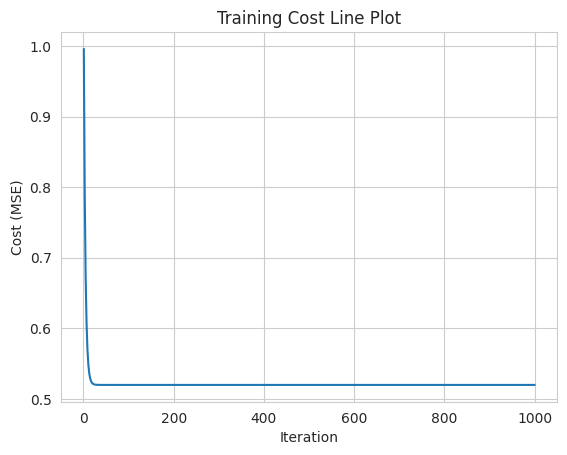

In [22]:
plt.title('Training Cost Line Plot')
plt.plot(range(1, linear_regression.iterations+1), linear_regression.cost_train_)
plt.ylabel('Cost (MSE)')
plt.xlabel('Iteration')
plt.show()

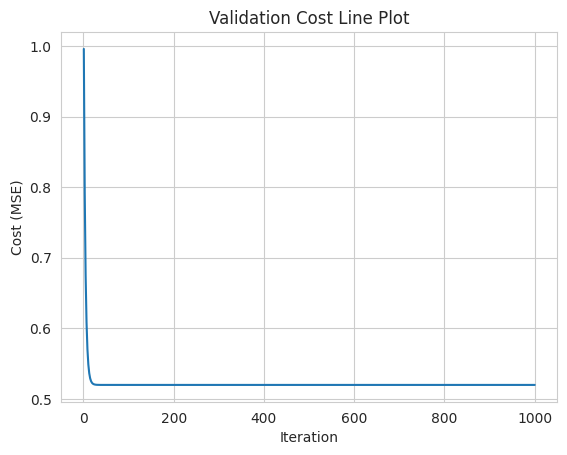

In [23]:
plt.title('Validation Cost Line Plot')
plt.plot(range(1, linear_regression.iterations+1), linear_regression.cost_val_)
plt.ylabel('Cost (MSE)')
plt.xlabel('Iteration')
plt.show()

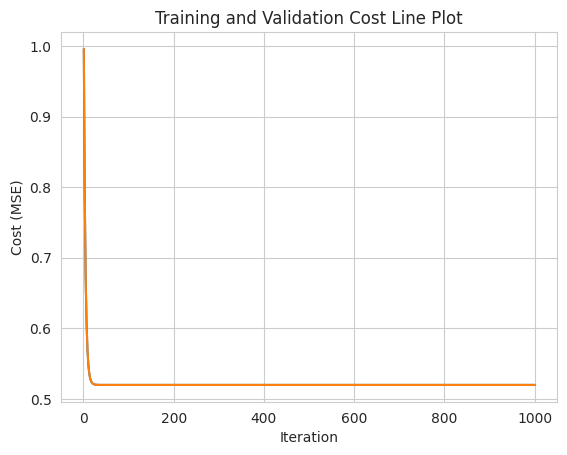

In [24]:
plt.title('Training and Validation Cost Line Plot')
plt.plot(range(1, linear_regression.iterations+1), linear_regression.cost_train_)
plt.plot(range(1, linear_regression.iterations+1), linear_regression.cost_val_)
plt.ylabel('Cost (MSE)')
plt.xlabel('Iteration')
plt.show()

In [25]:
linear_regression = LinearRegression(learning_rate=learning_rate,
                                     iterations=linear_regression.low_cost)

linear_regression.fit(X_train, y_train, X_val, y_val)


Training Iteration: 	 1 	Training Cost: 		 0.9957187279335077
Validation Iteration: 	 1 	Validation Cost: 	 0.9957187279335077

Training Iteration: 	 2 	Training Cost: 		 0.8794549092700608
Validation Iteration: 	 2 	Validation Cost: 	 0.8794549092700608

Training Iteration: 	 3 	Training Cost: 		 0.791598477044637
Validation Iteration: 	 3 	Validation Cost: 	 0.791598477044637

Training Iteration: 	 4 	Training Cost: 		 0.7252084909300878
Validation Iteration: 	 4 	Validation Cost: 	 0.7252084909300878

Training Iteration: 	 5 	Training Cost: 		 0.6750399318451884
Validation Iteration: 	 5 	Validation Cost: 	 0.6750399318451884

Training Iteration: 	 6 	Training Cost: 		 0.6371293271002079
Validation Iteration: 	 6 	Validation Cost: 	 0.6371293271002079

Training Iteration: 	 7 	Training Cost: 		 0.6084816223762911
Validation Iteration: 	 7 	Validation Cost: 	 0.6084816223762911

Training Iteration: 	 8 	Training Cost: 		 0.5868335622383477
Validation Iteration: 	 8 	Validation Cost:

In [26]:
print(f'Minimum Cost: {min(linear_regression.cost_val_)}')
print(f'Set Number of Iterations to: {linear_regression.low_cost}')

Minimum Cost: 0.5198817163500865
Set Number of Iterations to: 199


# Test Evaluation Metrics

In [27]:
y_pred = linear_regression.predict(X_test)
y_pred

array([-0.79997037, -0.48967393, -0.14335084, ...,  1.95535688,
       -0.39707047, -0.11707   ])

In [28]:
# Python method to calculate correlation coefficient metrics
def correlation(X, y):
    # Import Scipy libraray
    import scipy.stats

    # Calculate Pearson's Linear Correlation Coefficient with Scipy
    PLCC = scipy.stats.pearsonr(X, y)  # Pearson's r

    # Calculate Spearman Rank Correlation Coefficient (SRCC) with Scipy
    SRCC = scipy.stats.spearmanr(X, y)  # Spearman's rho

    # Calculate Kendalls Rank Correlation Coefficient (KRCC) with Scipy
    KRCC = scipy.stats.kendalltau(X, y)  # Kendall's tau

    # Prints out the correlation performance metric results to the screen
    print("PLCC: ", PLCC)
    print("SRCC: ", SRCC)
    print("KRCC: ", KRCC)

In [29]:
# Calls the correlation coefficient Python method to calculate PLCC, SRCC, and KRCC
# with SciPy
correlation(y_pred, y_test)

PLCC:  PearsonRResult(statistic=0.6775016011370294, pvalue=0.0)
SRCC:  SignificanceResult(statistic=0.6717539981126641, pvalue=0.0)
KRCC:  SignificanceResult(statistic=0.490677943048135, pvalue=0.0)


In [30]:
metrics.r2_score(y_test, y_pred)

0.45877772213949575

In [31]:
metrics.mean_squared_error(y_test, y_pred)

0.5326291707409194

# Plot the Simple Linear Regression Model Predictions

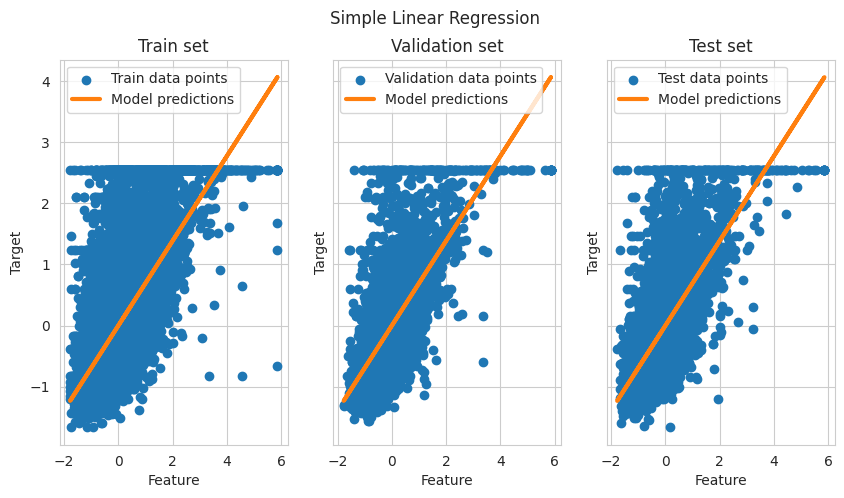

In [32]:
fig, ax = plt.subplots(ncols=3, figsize=(10, 5), sharex=True, sharey=True)

ax[0].scatter(X_train, y_train, label="Train data points")
ax[0].plot(
    X_train,
    linear_regression.predict(X_train),
    linewidth=3,
    color="tab:orange",
    label="Model predictions",
)
ax[0].set(xlabel="Feature", ylabel="Target", title="Train set")
ax[0].legend()

ax[1].scatter(X_val, y_val, label="Validation data points")
ax[1].plot(X_val, linear_regression.predict(X_val), linewidth=3, color="tab:orange", label="Model predictions")
ax[1].set(xlabel="Feature", ylabel="Target", title="Validation set")
ax[1].legend()

ax[2].scatter(X_test, y_test, label="Test data points")
ax[2].plot(X_test, y_pred, linewidth=3, color="tab:orange", label="Model predictions")
ax[2].set(xlabel="Feature", ylabel="Target", title="Test set")
ax[2].legend()

fig.suptitle("Simple Linear Regression")

plt.show()

# Multiple Linear Regression

In [33]:
X = pd.read_csv('/content/drive/MyDrive/Linear_Regression/X.csv')
y = pd.read_csv('/content/drive/MyDrive/Linear_Regression/y.csv')

X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [34]:
y

,MedHouseValue
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


# Convert the Dataset from Pandas DataFrames to NumPy Arrays

In [35]:
X = X.values
print('X shape: ', X.shape)
y = y.values.ravel()
print('y shape: ', y.shape)

X shape:  (20640, 8)
y shape:  (20640,)


# Normalise the Dataset

In [36]:
standard_x = StandardScaler()
standard_y = StandardScaler()
X = standard_x.fit_transform(X)
y = standard_y.fit_transform(y[:, np.newaxis]).flatten()

# Split the Training and Test Data

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X train shape: ', X_train.shape)
print('y train shape: ', y_train.shape)
print('X test shape: ', X_test.shape)
print('y test shape: ', y_test.shape)

X train shape:  (16512, 8)
y train shape:  (16512,)
X test shape:  (4128, 8)
y test shape:  (4128,)


In [38]:
X_train

array([[-0.32165429,  0.34647803, -0.16625886, ...,  0.05980847,
        -1.36797628,  1.26764451],
       [-0.03061993,  1.61780729, -0.3861807 , ..., -0.12830597,
        -0.87169852,  0.7036268 ],
       [ 0.1503488 , -1.95780625,  0.08764093, ..., -0.03345346,
        -0.45501247, -0.45435647],
       ...,
       [-0.49283239,  0.58485227, -0.58294927, ...,  0.02517025,
        -0.74997001,  0.59381804],
       [ 0.97302487, -1.08376738,  0.39058403, ...,  0.01042151,
         0.91209231, -1.19306993],
       [-0.68174943,  1.85618152, -0.81905034, ..., -0.09262259,
         1.00104776, -1.42267006]])

In [39]:
y_train

array([-0.90001975,  1.51867493, -0.29686264, ...,  0.13210686,
        0.66420236,  1.02384345])

In [40]:
X_test

array([[-1.15248922, -0.2891866 , -0.49989596, ...,  0.07768129,
         0.20044873,  0.27936569],
       [-0.70501534,  0.10810379, -0.1574771 , ..., -0.03763415,
        -0.23028292,  0.05475686],
       [-0.20558796,  1.85618152, -0.5868143 , ..., -0.164679  ,
         1.01509336, -1.43265267],
       ...,
       [ 2.82092723, -0.2891866 ,  0.73104024, ..., -0.02697551,
         0.78568194, -1.23799169],
       [-0.57147326,  0.58485227, -0.05657389, ..., -0.04641411,
         0.53286119, -0.09498235],
       [-0.16768875, -0.92485123, -0.58209158, ...,  0.06347664,
        -0.66101456,  0.59880935]])

In [41]:
y_test

array([-1.37925233, -1.39571783,  2.54041094, ...,  2.54041094,
       -1.16606749, -0.4797163 ])

# Split the Training and Validation Data

In [42]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print('X train shape: ', X_train.shape)
print('y train shape: ', y_train.shape)
print('X val shape: ', X_val.shape)
print('y val shape: ', y_val.shape)

X train shape:  (13209, 8)
y train shape:  (13209,)
X val shape:  (3303, 8)
y val shape:  (3303,)


In [43]:
X_train

array([[ 0.44017249, -0.13027044,  0.44228214, ...,  0.03014364,
         1.10873067, -0.69893052],
       [ 0.00227869, -1.08376738, -0.14978864, ..., -0.04039273,
        -0.71719695,  0.8483747 ],
       [-0.51999349, -0.20972852, -0.05593192, ..., -0.01517569,
        -0.87638038,  0.85835732],
       ...,
       [ 0.05986443, -0.84539315,  0.04883938, ...,  0.01654854,
        -1.35393068,  1.28760974],
       [ 0.33716033, -1.00430931, -0.41013242, ..., -0.09483536,
        -0.83892546,  0.8483747 ],
       [ 0.17335152,  0.50539419, -0.42718608, ..., -0.00904225,
        -0.8061524 ,  0.62376588]])

In [44]:
y_train

array([-0.25959862, -0.2907964 , -0.01868242, ...,  0.07317772,
       -0.58804193, -0.221468  ])

In [45]:
X_val

array([[-0.17537386,  0.50539419,  0.45064886, ..., -0.01156442,
         0.51881559, -0.13990412],
       [-0.8938271 , -0.44810276, -0.46150688, ..., -0.03396046,
         2.52265411, -2.29115751],
       [ 0.1770888 , -1.16322546, -0.6111567 , ..., -0.10490623,
        -0.91851717,  0.82341817],
       ...,
       [-0.14694945, -0.60701891, -0.34278419, ..., -0.01139758,
        -1.01215449,  0.93322693],
       [-0.12931579, -0.2891866 , -0.04036317, ..., -0.09442963,
        -1.32583949,  1.24268797],
       [-0.12026209, -0.76593507, -0.43845886, ..., -0.04099133,
        -0.84828919,  0.80345294]])

In [46]:
y_val

array([-0.95461586, -1.13833613,  1.94157819, ...,  0.85572207,
       -0.19373664,  0.02204802])

# Train the Multiple Linear Regression Model

In [47]:
# Hyperparameters
learning_rate = 0.00001
iterations = 3000
# --------------

linear_regression = LinearRegression(learning_rate=learning_rate, iterations=iterations)

linear_regression.fit(X_train, y_train, X_val, y_val)

Streaming output truncated to the last 5000 lines.
Training Iteration: 	 1335 	Training Cost: 		 0.38519411269671416
Validation Iteration: 	 1335 	Validation Cost: 	 0.38519411269671416

Training Iteration: 	 1336 	Training Cost: 		 0.38519411268629694
Validation Iteration: 	 1336 	Validation Cost: 	 0.38519411268629694

Training Iteration: 	 1337 	Training Cost: 		 0.3851941126759993
Validation Iteration: 	 1337 	Validation Cost: 	 0.3851941126759993

Training Iteration: 	 1338 	Training Cost: 		 0.3851941126658199
Validation Iteration: 	 1338 	Validation Cost: 	 0.3851941126658199

Training Iteration: 	 1339 	Training Cost: 		 0.38519411265575737
Validation Iteration: 	 1339 	Validation Cost: 	 0.38519411265575737

Training Iteration: 	 1340 	Training Cost: 		 0.38519411264581044
Validation Iteration: 	 1340 	Validation Cost: 	 0.38519411264581044

Training Iteration: 	 1341 	Training Cost: 		 0.3851941126359778
Validation Iteration: 	 1341 	Validation Cost: 	 0.3851941126359778

Tra

In [48]:
# Index 0 = bias, index 1 to 8 = weights
print(f'Trained Bias and Weights {linear_regression.w_}')
print(f'Minimum Cost: {min(linear_regression.cost_val_)}')
print(f'Set Number of Iterations to: {linear_regression.low_cost}')

Trained Bias and Weights [ 7.28223364e-04  7.43621262e-01  1.04830068e-01 -2.69848439e-01
  3.20966793e-01 -7.20586087e-03 -3.57393451e-02 -7.71590773e-01
 -7.45438393e-01]
Minimum Cost: 0.38519411178950436
Set Number of Iterations to: 2807


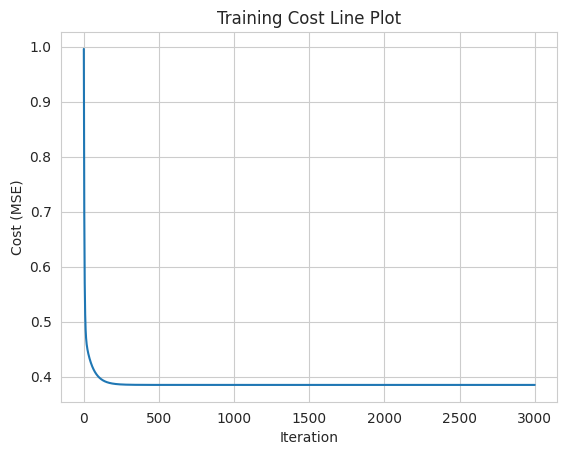

In [49]:
plt.title('Training Cost Line Plot')
plt.plot(range(1, linear_regression.iterations+1), linear_regression.cost_train_)
plt.ylabel('Cost (MSE)')
plt.xlabel('Iteration')
plt.show()

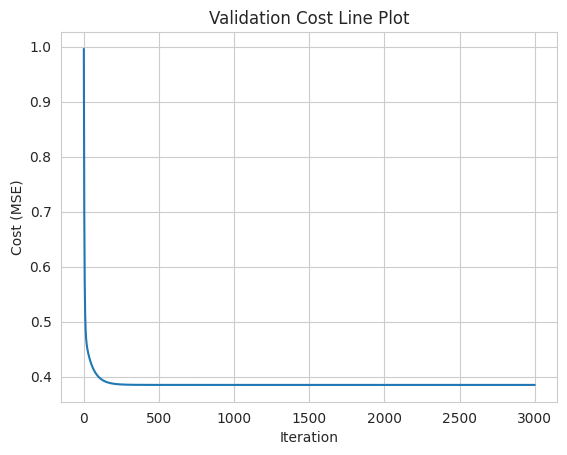

In [50]:
plt.title('Validation Cost Line Plot')
plt.plot(range(1, linear_regression.iterations+1), linear_regression.cost_val_)
plt.ylabel('Cost (MSE)')
plt.xlabel('Iteration')
plt.show()

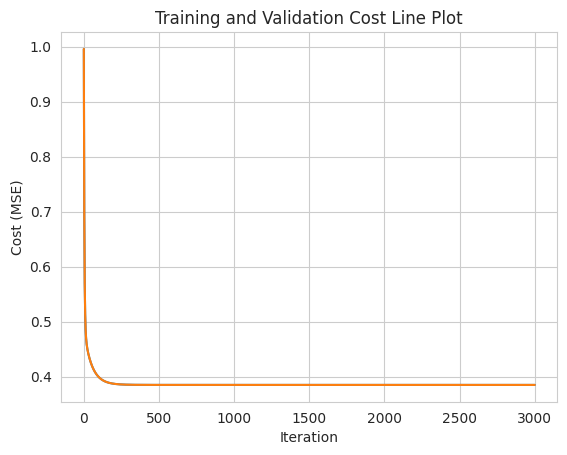

In [51]:
plt.title('Training and Validation Cost Line Plot')
plt.plot(range(1, linear_regression.iterations+1), linear_regression.cost_train_)
plt.plot(range(1, linear_regression.iterations+1), linear_regression.cost_val_)
plt.ylabel('Cost (MSE)')
plt.xlabel('Iteration')
plt.show()

In [52]:
linear_regression = LinearRegression(learning_rate=learning_rate,
                                     iterations=linear_regression.low_cost)

linear_regression.fit(X_train, y_train, X_val, y_val)

Streaming output truncated to the last 5000 lines.
Training Iteration: 	 1142 	Training Cost: 		 0.3851941202216198
Validation Iteration: 	 1142 	Validation Cost: 	 0.3851941202216198

Training Iteration: 	 1143 	Training Cost: 		 0.3851941201247445
Validation Iteration: 	 1143 	Validation Cost: 	 0.3851941201247445

Training Iteration: 	 1144 	Training Cost: 		 0.3851941200289827
Validation Iteration: 	 1144 	Validation Cost: 	 0.3851941200289827

Training Iteration: 	 1145 	Training Cost: 		 0.3851941199343216
Validation Iteration: 	 1145 	Validation Cost: 	 0.3851941199343216

Training Iteration: 	 1146 	Training Cost: 		 0.38519411984074864
Validation Iteration: 	 1146 	Validation Cost: 	 0.38519411984074864

Training Iteration: 	 1147 	Training Cost: 		 0.38519411974825113
Validation Iteration: 	 1147 	Validation Cost: 	 0.38519411974825113

Training Iteration: 	 1148 	Training Cost: 		 0.3851941196568168
Validation Iteration: 	 1148 	Validation Cost: 	 0.3851941196568168

Trainin

In [53]:
print(f'Minimum Cost: {min(linear_regression.cost_val_)}')
print(f'Set Number of Iterations to: {linear_regression.low_cost}')

Minimum Cost: 0.38519411178950436
Set Number of Iterations to: 2807


# Test Evaluation Metrics

In [54]:
y_pred = linear_regression.predict(X_test)
y_pred

array([-1.16756834, -0.26681142,  0.5525369 , ...,  2.08616549,
       -0.76198854, -0.04681798])

In [55]:
# Calls the correlation coefficient Python method to calculate PLCC, SRCC, and KRCC
# with SciPy
correlation(y_pred, y_test)

PLCC:  PearsonRResult(statistic=0.7606182230367169, pvalue=0.0)
SRCC:  SignificanceResult(statistic=0.8062287389627869, pvalue=0.0)
KRCC:  SignificanceResult(statistic=0.6174703618779245, pvalue=0.0)


In [56]:
metrics.r2_score(y_test, y_pred)

0.5768706116886424

In [57]:
metrics.mean_squared_error(y_test, y_pred)

0.4164112684039929

# Plot the Model Predictions

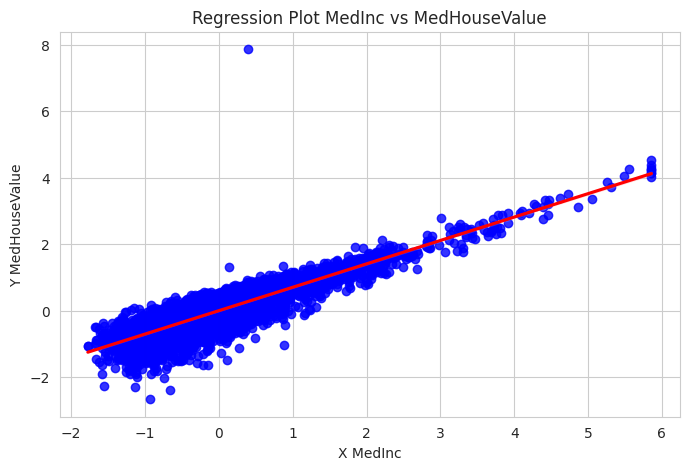

In [58]:
# Create the regression plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.regplot(x=X_test[:, [0]], y=y_pred, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel("X MedInc")
plt.ylabel("Y MedHouseValue")
plt.title("Regression Plot MedInc vs MedHouseValue")

# Show the plot
plt.show()

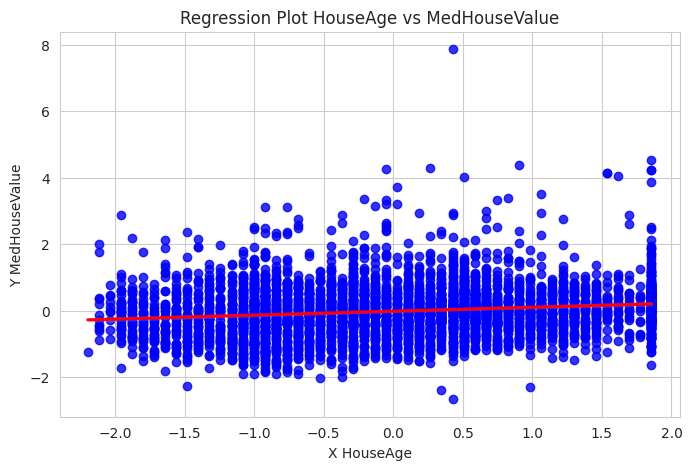

In [59]:
# Create the regression plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.regplot(x=X_test[:, [1]], y=y_pred, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel("X HouseAge")
plt.ylabel("Y MedHouseValue")
plt.title("Regression Plot HouseAge vs MedHouseValue")

# Show the plot
plt.show()

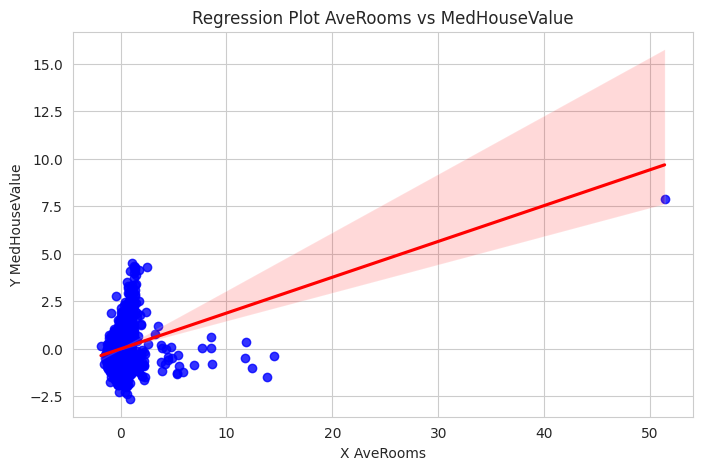

In [60]:
# Create the regression plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.regplot(x=X_test[:, [2]], y=y_pred, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel("X AveRooms")
plt.ylabel("Y MedHouseValue")
plt.title("Regression Plot AveRooms vs MedHouseValue")

# Show the plot
plt.show()

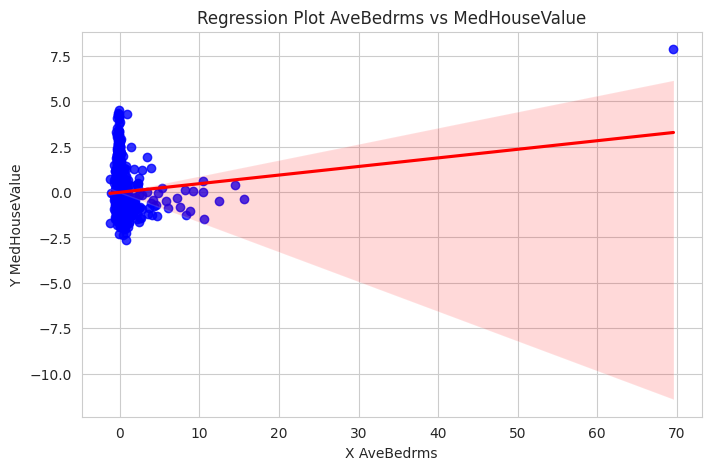

In [61]:
# Create the regression plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.regplot(x=X_test[:, [3]], y=y_pred, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel("X AveBedrms")
plt.ylabel("Y MedHouseValue")
plt.title("Regression Plot AveBedrms vs MedHouseValue")

# Show the plot
plt.show()

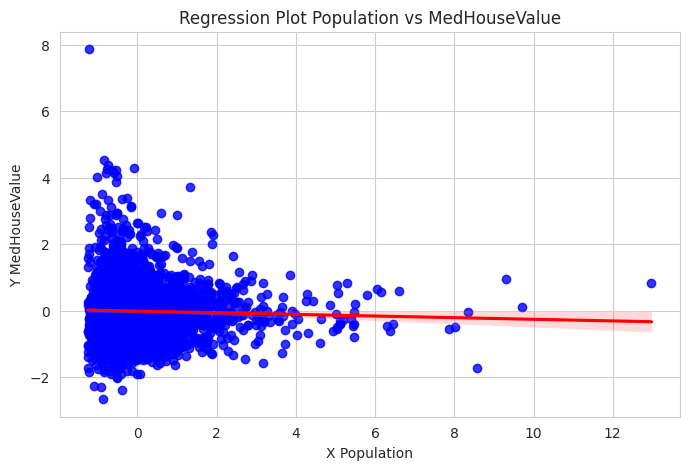

In [62]:
# Create the regression plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.regplot(x=X_test[:, [4]], y=y_pred, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel("X Population")
plt.ylabel("Y MedHouseValue")
plt.title("Regression Plot Population vs MedHouseValue")

# Show the plot
plt.show()

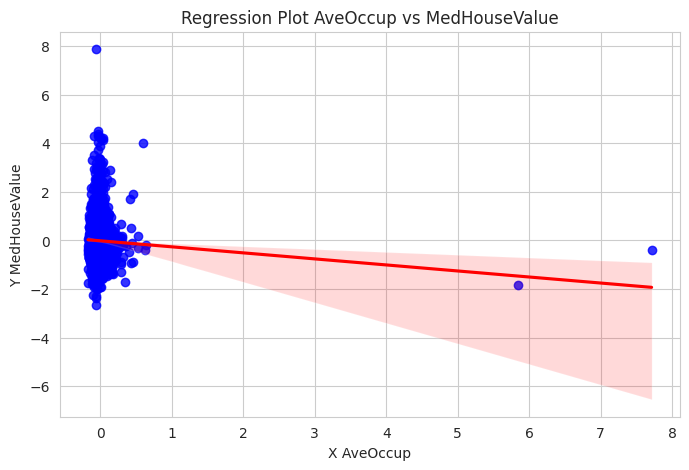

In [63]:
# Create the regression plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.regplot(x=X_test[:, [5]], y=y_pred, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel("X AveOccup")
plt.ylabel("Y MedHouseValue")
plt.title("Regression Plot AveOccup vs MedHouseValue")

# Show the plot
plt.show()

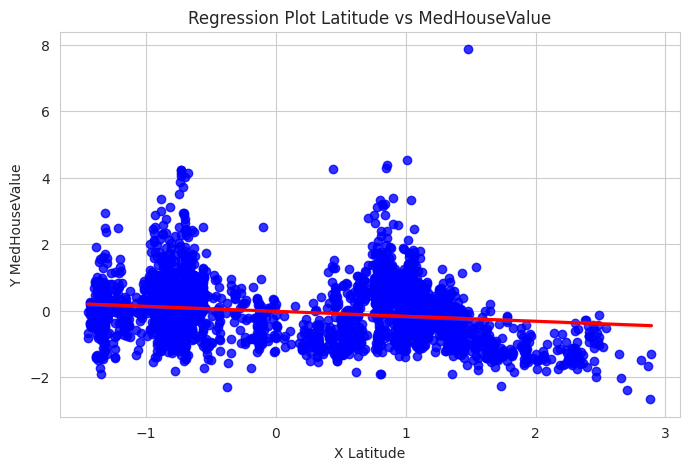

In [64]:
# Create the regression plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.regplot(x=X_test[:, [6]], y=y_pred, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel("X Latitude")
plt.ylabel("Y MedHouseValue")
plt.title("Regression Plot Latitude vs MedHouseValue")

# Show the plot
plt.show()

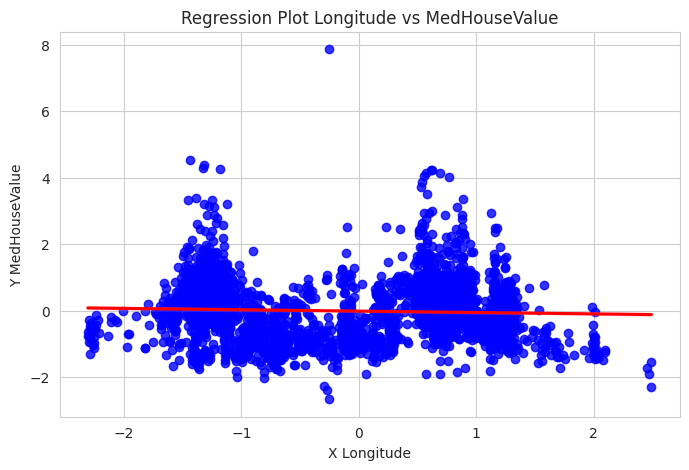

In [65]:
# Create the regression plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.regplot(x=X_test[:, [7]], y=y_pred, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel("X Longitude")
plt.ylabel("Y MedHouseValue")
plt.title("Regression Plot Longitude vs MedHouseValue")

# Show the plot
plt.show()

In [66]:
%whos

Variable            Type                Data/Info
-------------------------------------------------
LinearRegression    type                <class '__main__.LinearRegression'>
StandardScaler      type                <class 'sklearn.preproces<...>ng._data.StandardScaler'>
X                   ndarray             20640x8: 165120 elems, type `float64`, 1320960 bytes (1.259765625 Mb)
X_test              ndarray             4128x8: 33024 elems, type `float64`, 264192 bytes (258.0 kb)
X_train             ndarray             13209x8: 105672 elems, type `float64`, 845376 bytes (825.5625 kb)
X_val               ndarray             3303x8: 26424 elems, type `float64`, 211392 bytes (206.4375 kb)
ax                  ndarray             3: 3 elems, type `object`, 24 bytes
correlation         function            <function correlation at 0x7854f97e1ee0>
drive               module              <module 'google.colab.dri<...>s/google/colab/drive.py'>
fig                 Figure              Figure(1000x50